<a href="https://colab.research.google.com/github/IvRodco/EstadisticaAplicasa_1899843/blob/main/Tarea5_ILRA_1899843_EAG41_sept2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estadistica Aplicada

Tarea 5

Ivanna LIzeth Rodriguez Ambriz

1899843

Gpo:41

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install lifelines

In [11]:
# Librerias especializadas
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import ExponentialFitter, WeibullFitter, LogNormalFitter
from lifelines import CoxPHFitter
import seaborn as sns

In [21]:
## importar los datos
data = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')
data


,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1
...,...,...,...
95,12,0,1
96,22,0,1
97,30,0,0
98,10,0,0


###Problema 3

In [22]:
#  a) Ajuste Modelo de supervivencia exponencial
Mexpon =ExponentialFitter ().fit(data['tiempo'],data['quebrar'])
Mexpon.print_summary()


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -212.48
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.77       4.44            22.07            39.48

          cmp to    z      p   -log2(p)
lambda_     0.00 6.93 <0.005      37.77
---
AIC = 426.95

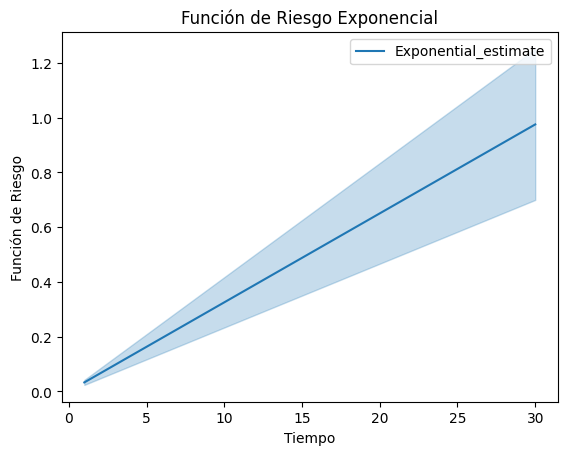

In [23]:
#  b) Grafica de la funcion de riesgo
Mexpon.plot()
plt.title("Función de Riesgo Exponencial")
plt.xlabel("Tiempo")
plt.ylabel("Función de Riesgo")
plt.show()

In [24]:
#  c) Riesgo de que una empresa quiebre según la función exponencial

# Sacamos el riesgo a 1 unidad de tiempo
riesgo_exponencial = Mexpon.predict(1)
print(f"Riesgo de que una empresa quiebre a 1 unidad de tiempo: {riesgo_exponencial:.2%}")

Riesgo de que una empresa quiebre a 1 unidad de tiempo: 96.80%


###Problema 4


In [29]:
#  a) Ajuste un modelo Weibull de supervivencia.
Mweibull = WeibullFitter().fit(data['tiempo'],data['quebrar'])
Mweibull.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -204.61
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  25.46       2.26            21.03            29.89
rho_      1.69       0.20             1.30             2.09

          cmp to     z      p   -log2(p)
lambda_     1.00 10.83 <0.005      88.36
rho_        1.00  3.44 <0.005      10.73
---
AIC = 413.22

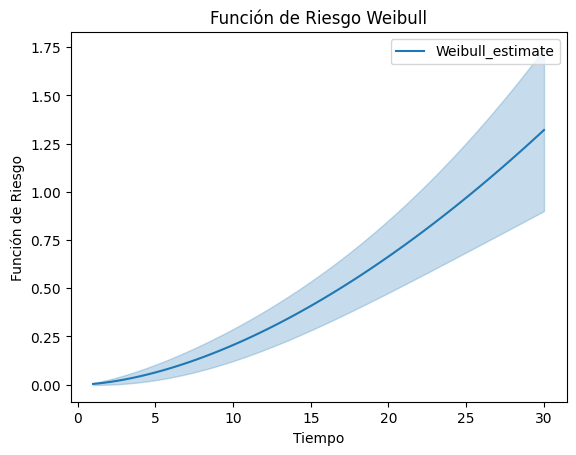

In [30]:
#  b) Grafique la función de riesgo.
Mweibull.plot()
plt.title("Función de Riesgo Weibull")
plt.xlabel("Tiempo")
plt.ylabel("Función de Riesgo")
plt.show()

c)  La función de riesgo en el modelo Weibull tiene forma creciente. Esto significa que a medida que aumenta el tiempo, la tasa de falla o quiebra de una empresa también aumenta. Es decir, a medida que las empresas envejecen, tienen una mayor probabilidad de quiebra.

###Problema 5

In [34]:
#  a) Estimar la función de supervivencia y la mediana de tiempo de supervivencia.

km = KaplanMeierFitter().fit(data['tiempo'],data['quebrar'])

# Función de supervivencia
supervivencia= km.survival_function_
print("Función de Supervivencia:")
print(supervivencia)

# Mediana de tiempo de supervivencia
tiempo_supervivencia = km.median_survival_time_
print(f"Mediana de Tiempo de Supervivencia: {tiempo_supervivencia} años")

Función de Supervivencia:
          KM_estimate
timeline             
0.0          1.000000
1.0          0.990000
2.0          0.959694
3.0          0.928400
4.0          0.928400
5.0          0.917477
7.0          0.873261
8.0          0.829046
9.0          0.829046
10.0         0.791924
11.0         0.766378
12.0         0.726043
14.0         0.726043
15.0         0.711225
16.0         0.664841
17.0         0.664841
18.0         0.646373
19.0         0.627362
20.0         0.607757
21.0         0.586800
22.0         0.543333
23.0         0.475417
24.0         0.475417
25.0         0.404104
26.0         0.378848
27.0         0.320563
28.0         0.291421
29.0         0.259041
30.0         0.129521
Mediana de Tiempo de Supervivencia: 23.0 años


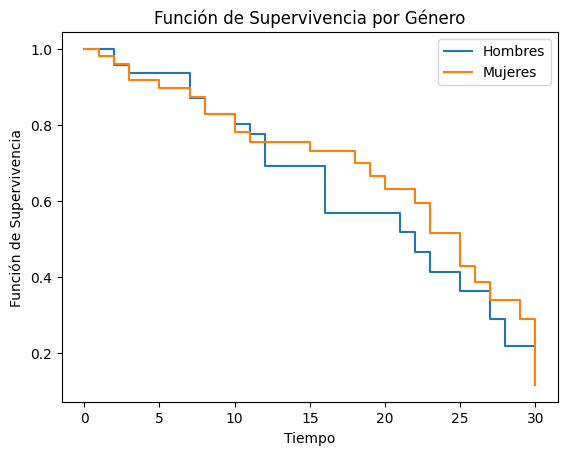

In [35]:
#  b) Estimar la función de supervivencia por Kaplan-Meier para hombres y mujeres y grafica

# Dividir los datos en hombres y mujeres
data_hombres = data[data['mujer'] == 0]
data_mujeres = data[data['mujer'] == 1]

# Ajustar modelos Kaplan-Meier para hombres y mujeres
km_hombres = KaplanMeierFitter()
km_mujeres = KaplanMeierFitter()

km_hombres.fit(data_hombres['tiempo'],data_hombres['quebrar'], label='Hombres')
km_mujeres.fit(data_mujeres['tiempo'],data_mujeres['quebrar'], label='Mujeres')

# Graficar las funciones de supervivencia
km_hombres.plot(ci_show=False)
km_mujeres.plot(ci_show=False)

plt.title("Función de Supervivencia por Género")
plt.xlabel("Tiempo")
plt.ylabel("Función de Supervivencia")
plt.legend()
plt.show()


In [37]:
# c) Para refutar o confirmar la afirmación de que las empresas fundadas por hombres quiebran más rápido, utilizamos logrank

# H0: Las hembresas fundadas por hombres quiebran mas rapido
# H1: se refuta la afirmacion anterior

# importamos la libreria logrank
from lifelines.statistics import logrank_test

lg = logrank_test(data_hombres['tiempo'], data_mujeres['tiempo'], data_hombres['quebrar'], data_mujeres['quebrar'])
print("Estadística de log-rank:", lg.test_statistic)
print("Valor p:", lg.p_value)

Estadística de log-rank: 0.2848827074567972
Valor p: 0.5935186303825359


Entonces como el p valor no es menor a logrank rechazamos H0, por lo que no hay evidencia para decir que las empresas fundadas por hombres quiebran mas rapido